In [ ]:
import pandas as pd
from scipy.stats import norm
from scipy import stats

In [ ]:
help(stats)

In [ ]:
data1=pd.read_excel("/content/drive/MyDrive/Hack Corruption - Contractor/datos/torch2.xlsx")

In [ ]:
size=4

In [ ]:
data1["range-"]=data1["predict"].apply(lambda x:x*(1-size))
data1["range+"]=data1["predict"].apply(lambda x:x*(1+size))

In [ ]:
data1["in_range"]=data1.apply(
    lambda row:1 if row[1]<row["range+"] and row[1]>row["range-"] else 0,
    axis=1)

In [ ]:
data1["in_range"].mean()

0.9368888888888889

In [ ]:
data1["perc_error"]=data1.apply(
    lambda row:(row[1]-row["predict"])/row["predict"],
    axis=1)

In [ ]:
num_contracts=data1["perc_error"].count()

In [ ]:
num_contracts

18000

In [ ]:
contr_inrange=data1["perc_error"][data1["in_range"]==1].count()
print(contr_inrange/num_contracts)

0.9368888888888889


In [ ]:
mu,sigma,kurt=stats.t.fit(data1["perc_error"][data1["in_range"]==1])

In [ ]:
mu

2.517426572889252

<Axes: >

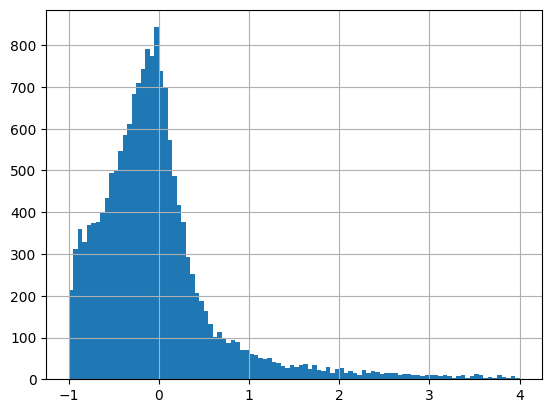

In [ ]:
data1["perc_error"][data1["in_range"]==1].hist(bins=100)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

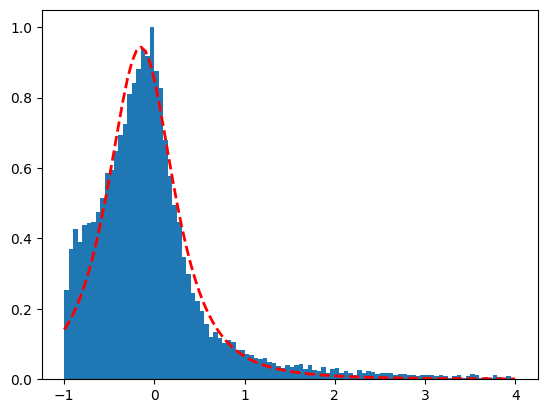

In [ ]:
n, bins, patches = plt.hist(
    data1["perc_error"][data1["in_range"]==1],bins=100,density=True
    )

# add a 'best fit' line
y = stats.t.pdf( bins, mu, sigma,kurt)
l = plt.plot(bins, y, 'r--', linewidth=2)

In [ ]:
distribution=stats.t( mu, sigma,kurt)

In [ ]:
distribution


In [ ]:
help(distribution.pdf)

Help on method pdf in module scipy.stats._distn_infrastructure:

pdf(x) method of scipy.stats._distn_infrastructure.rv_continuous_frozen instance



In [ ]:
mu

2.517426572889252

In [ ]:
distribution.pdf(-0.151242)

0.9438720719508218

In [ ]:
for i in range(0,100):
  print(distribution.pdf(i/100-0.5))

0.5728308194735476
0.587184259691557
0.6016674244002491
0.616259377380496
0.6309373798801615
0.6456768732556865
0.6604514751068873
0.675232990422665
0.6899914392146417
0.7046951020410105
0.7193105847107433
0.7338029033060645
0.7481355904667897
0.7622708236427157
0.7761695757399367
0.789791788265161
0.8030965667118827
0.8160423975381287
0.8285873856637971
0.8406895109742044
0.8523069018649579
0.8633981234126313
0.87392247731814
0.8838403103582676
0.8931133277089868
0.9017049071855955
0.9095804101921634
0.9167074849982277
0.9230563578742291
0.9286001076267625
0.9333149191855523
0.9371803121082685
0.9401793401855922
0.9422987587425801
0.9435291567350667
0.9438650513200819
0.9433049432225021
0.941851331909527
0.9395106903012953
0.9362933994702346
0.9322136444934457
0.9272892733019464
0.9215416209995742
0.91499530268642
0.9076779783030319
0.8996200934015317
0.8908546000408405
0.8814166621915196
0.871343350120898
0.8606733282141029
0.8494465405772563
0.8377038985740106
0.8254869741763561
0.8

In [ ]:
data1["likelihood"]=data1["perc_error"].apply(lambda x: distribution.pdf(x))

<Axes: >

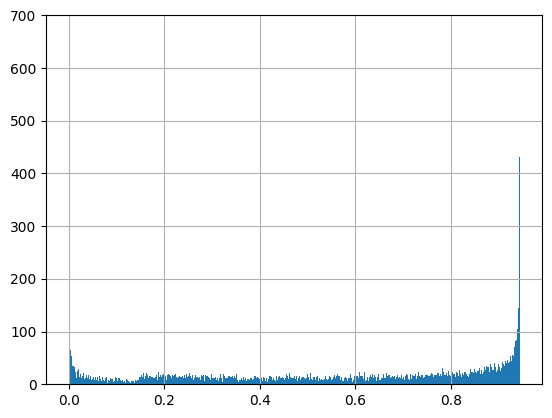

In [ ]:
data1["likelihood"].hist(bins=1000)